# Keras Basic
### * Sequential Layer 의 주요 레이어 정리 
#### [1]  Dense Layer : Fully Connected Layer, layer의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결 되는 Layer
#### [2]  Flatten Layer : 다차원(4차원)을 2차원으로 축소하여 FC Layer에 전달한다
#### [3]  Conv2D Layer : 이미지 특징을 추출하는 Convolution Layer 
#### [4]  MaxPool2D Layer : 중요 데이터(값이 큰 데이터)를 subsampling 하는 Layer
#### [5]  Dropout Layer : 학습시 신경망의 과적합을 막기위해 일부 뉴런을 제거하는 Layer

### [1] Dense Layer

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# keras 를 이용한 XOR 네트워크

# train data set 
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]   # (4,2)

y_data = [[0],
          [1],
          [1],
          [0]]     # (4,1)

x_train = np.array(x_data,dtype=np.float32)
y_train = np.array(y_data,dtype=np.float32)

In [18]:
# Dense Layer 구현
model = tf.keras.Sequential([
    # (4,2) * (2,2) = (4,2)   , W:2*2=4, b=2 --> Params : 6
    tf.keras.layers.Dense(units=4,activation='sigmoid',input_shape=(2,)) ,
    # (4,2) * (2,1) = (4,1)   , W:2*1, b=1 --> Params : 3
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 학습
history = model.fit(x_train,y_train,epochs=1000,batch_size=1,verbose=1) # verbose=1, 메세지를 출력

Epoch 1/1000
4/4 [==============================] - 1s 1ms/step - loss: 0.7987 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 996us/step - loss: 0.7659 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7577 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 997us/step - loss: 0.7568 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7504 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7348 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 997us/step - loss: 0.7348 - accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7231 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7190 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 997us/step - loss: 0.7136 - accuracy: 0.5000
Epoch 11/10

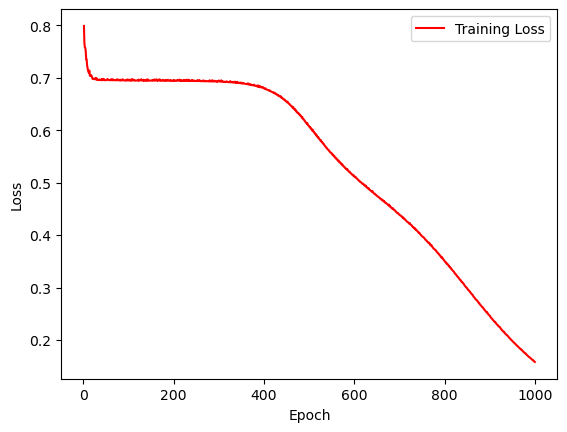

In [5]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

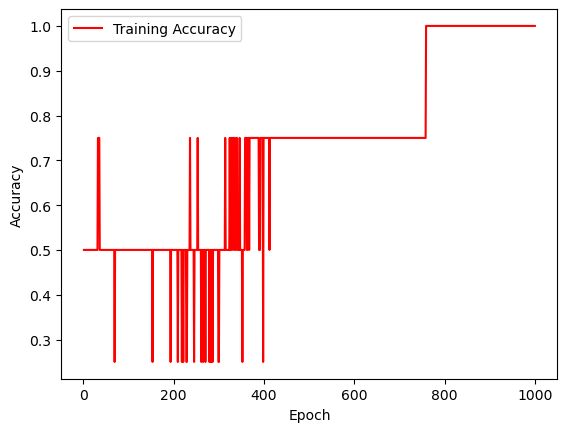

In [16]:
# 시각화
# epoch_count = range(1, len(history.history['accuracy']) + 1)
# plt.plot(epoch_count, history.history['accuracy'], 'r-')
# plt.legend(['Training Accuracy'])
# plt.xlabel('Epoch')                   ㅏㅓㅜbl
# plt.ylabel('Accuracy')
# plt.show()

In [6]:
# 예측
preds = model.predict(x_train)
np.round(preds)

1/1 [==============================] - 0s 44ms/step


array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [7]:
# 평가
model.evaluate(x_train,y_train) # accuracy : 1.0

1/1 [==============================] - 0s 78ms/step - loss: 0.1574 - accuracy: 1.0000


[0.15738904476165771, 1.0]

In [8]:
# X,Y input data 
x_train = np.array([[1.0,   2.0,  3.0,  4.0,  5.0],
                    [6.0,   7.0,  8.0,  9.0, 10.0],
                    [11.0, 12.0, 13.0, 14.0, 15.0]])  # (3,5)
                    
                    
y_train = np.array([[1.1,   2.2,  3.3,  4.4,  5.5],
                    [6.1,   7.2,  8.3,  9.4, 10.5],
                    [11.1, 12.2, 13.3, 14.4, 15.5]]) # (3,5)
model = tf.keras.Sequential([
    # (3,1) * (1,100) = (3,100)   , Param :200 (W:1*100, b:100), (1 + 1) * 100 = 200
    # tf.keras.layers.Dense(units=100, activation='relu', input_shape=(1,)), # input data의 shape을 (?,1) 

    # (3,5) * (5,100) = (3,100)   , Param :600 (W:5*100, b:100), (5 + 1) * (100) = 600
    tf.keras.layers.Dense(units=100, activation='relu', input_shape=(5,)), # input data의 shape을 (?,5) 

    
    # (3,100) * (100,50) = (3,50)   , Param : 5050 (W:100*50, b:50), (100+1)*50 = 5
    # (3,25) * (25,5) = (3,5)   , Param : 130 (W:25*5, b:5), (25 + 1) * 5 = 130
    tf.keras.layers.Dense(units=5 , activation='relu' ),
    
#     # (3,5) * (5,1) = (3,1)   , Pram : 6  (W:5*1, b:1), (5 + 1) *1 = 6
#     tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               600       
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 학습
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 142ms/step - loss: 50.2090
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 30.6517
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 19.1058
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 15.2834
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 16.7036
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 19.4904
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 20.5058
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 19.5408
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 17.7928
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 16.2596
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 15.3442
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 15.0455
Epoch 13/100
1/1 [=============================

In [10]:
# 예측
model.predict(x_train)

1/1 [==============================] - 0s 26ms/step


array([[ 1.6663467,  0.       ,  3.491221 ,  4.0941243,  5.004678 ],
       [ 6.256047 ,  0.       ,  8.343939 ,  9.321487 , 10.347245 ],
       [10.845747 ,  0.       , 13.196655 , 14.548852 , 15.689812 ]],
      dtype=float32)

In [11]:
# 평가
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 45ms/step - loss: 13.7604


13.760367393493652

### [2] Flatten Layer

In [12]:
# 4차원 데이터를 2차원으로 축소하여 FC Layer에 전달
data = np.arange(1000*28*28*10).reshape(-1,28,28,10).astype(np.float32)
print(data.shape) # (None, 28, 28, 10)
layer = tf.keras.layers.Flatten()
# print(type(layer))
# dir(layer)
outputs = layer(data) # Layer는 함수처럼 사용가능
print(outputs.shape) # (None,28*28*10) = (None,7840)

(1000, 28, 28, 10)
(1000, 7840)


In [13]:
# 3차원 데이터를 2차원으로 축소하여 FC Layer에 전달
data = np.arange(1000*28*28).reshape(1000,28,28).astype(np.float32)
print(data.shape) # (None, 28, 28)
layer = tf.keras.layers.Flatten()
outputs = layer(data)
print(outputs.shape) # (None, 28*28) = (None,784)

(1000, 28, 28)
(1000, 784)


In [14]:
# 2차원 데이터는 그대로 2차원으로 FC Layer에 전달
data = np.arange(28*28).reshape(28,28).astype(np.float32)
print(data.shape) # (28, 28)
layer = tf.keras.layers.Flatten()
outputs = layer(data)
print(outputs.shape) # (28,28)

(28, 28)
(28, 28)


### [3] Dropout Layer

In [15]:
tf.random.set_seed(0)
data = np.arange(10).reshape(5,2).astype(np.float32)
print(data)

layer = tf.keras.layers.Dropout(0.3,input_shape=(2,))
outputs = layer(data,training=True)
# model.fit()호출 시는  학습 모드로 training=True가 되어 dropuout 적용
# model.evaluate() 호출 시는 예측 모드로 False가 되어 dropuout이 수행되지 않음

print(outputs) # 데이터의 30%는 0으로 나머지 데이터는  1/(1-0.3)으로 곱하여 scaled up된다
print(data*1/(1 - 0.3))

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
tf.Tensor(
[[ 0.         0.       ]
 [ 2.857143   4.285714 ]
 [ 5.714286   7.1428576]
 [ 8.571428  10.       ]
 [11.428572   0.       ]], shape=(5, 2), dtype=float32)
[[ 0.         1.4285715]
 [ 2.857143   4.285714 ]
 [ 5.714286   7.142857 ]
 [ 8.571428  10.       ]
 [11.428572  12.857143 ]]
